### Import Packages

In [0]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist, pdist, euclidean
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import scale
import warnings


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
style.use('seaborn-whitegrid')
warnings.filterwarnings('ignore')

### Load Files

In [2]:
url = 'https://raw.githubusercontent.com/fifa-19-player-stats/data/master/FIFA_clean_V2.csv'

df = pd.read_csv(url, index_col='Unnamed: 0')

print(df.shape)

df.head()


(18207, 88)


,id,name,age,photo,nationality,flag,overall,potential,club,clubLogo,special,preferredFoot,internationalReputation,weakFoot,skillMoves,workRate,bodyType,realFace,position,jerseyNumber,joined,loanedFrom,contractValidUntil,height,weight,...,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,valueEuro,wageEuro,releaseClauseEuro
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,2202,Left,5.0,4.0,4.0,Medium/ Medium,None,Yes,RF,10,"Jul 1, 2004",NaN,2021,5'7,159lbs,...,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110500000.0,565000.0,226500000.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,2228,Right,5.0,4.0,5.0,High/ Low,None,Yes,ST,7,"Jul 10, 2018",NaN,2022,6'2,183lbs,...,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000000.0,405000.0,127100000.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,2143,Right,5.0,5.0,5.0,High/ Medium,None,Yes,LW,10,"Aug 3, 2017",NaN,2022,5'9,150lbs,...,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118500000.0,290000.0,228100000.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1,"Jul 1, 2011",NaN,2020,6'4,168lbs,...,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000000.0,260000.0,138600000.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7,"Aug 30, 2015",NaN,2023,5'11,154lbs,...,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000000.0,355000.0,196400000.0


### In-Game Ratings

In [12]:
ig_ratings_cols = ['id', 'name','club', 'position','ls', 'st',
       'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
       'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb']

print(len(ig_ratings_cols))

df[ig_ratings_cols][0:50]

30


,id,name,club,position,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,FC Barcelona,RF,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,20801,Cristiano Ronaldo,Juventus,ST,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,Neymar Jr,Paris Saint-Germain,LW,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,De Gea,Manchester United,GK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,192985,K. De Bruyne,Manchester City,RCM,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
5,183277,E. Hazard,Chelsea,LF,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3
6,177003,L. Modrić,Real Madrid,RCM,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,86+3,88+3,88+3,88+3,86+3,82+3,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3
7,176580,L. Suárez,FC Barcelona,RS,87+5,87+5,87+5,86+5,87+5,87+5,87+5,86+5,85+5,85+5,85+5,84+5,79+5,79+5,79+5,84+5,69+5,68+5,68+5,68+5,69+5,66+5,63+5,63+5,63+5,66+5
8,155862,Sergio Ramos,Real Madrid,RCB,73+3,73+3,73+3,70+3,71+3,71+3,71+3,70+3,71+3,71+3,71+3,72+3,75+3,75+3,75+3,72+3,81+3,84+3,84+3,84+3,81+3,84+3,87+3,87+3,87+3,84+3
9,200389,J. Oblak,Atlético Madrid,GK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### In-Game Stats

In [3]:
ig_stats_cols = ['id', 'name','club','position','crossing', 'finishing', 'headingaccuracy', 'shortpassing',
       'volleys', 'dribbling', 'curve', 'fkaccuracy', 'longpassing',
       'ballcontrol', 'acceleration', 'sprintspeed', 'agility', 'reactions',
       'balance', 'shotpower', 'jumping', 'stamina', 'strength', 'longshots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standingtackle', 'slidingtackle', 'gkdiving',
       'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes']

df_stat = df[ig_stats_cols]

df_stat.head()

,id,name,club,position,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
0,158023,L. Messi,FC Barcelona,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,Juventus,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,Paris Saint-Germain,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,Manchester United,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,K. De Bruyne,Manchester City,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


### Base Stats Calculation (used in player badge)

In [0]:
df_stat2 = df_stat

In [5]:
'''

FIFA Base Stats

Pace: Sprint Speed x 0.55 + Acceleration x 0.45

Shooting: Finishing x 0.45 + Long shots x 0.2 + Shot power x 0.2 + Positioning x 0.05 + Penalties x 0.05 + Volleys x 0.05

Passing: Short Pass x 0.35 + Vision x 0.2 + Crossing x 0.2 + Long Pass x 0.15 + Curve x 0.05 + Freekick Accuracy x 0.05

Dribbling: Dribbling x 0.5 + Ball Control x 0.35 + Agility x 0.1 + Balance x 0.05

Defending: Marking x 0.3 + Stand Tackle x 0.3 + Interceptions x 0.2 + Heading Acc x 0.1 +Slide Tackle x 0.1

Physical: Strength x 0.5 + Stamina x 0.25 + Aggression x 0.2 + Jumping x 0.05

GKAbility: GKDiving x 0.2 + GKHandling x 0.2 + GKkicking x 0.2 + GKPositioning x 0.2 + GKReflexes x 0.2


'''
df_stat2 = df_stat

df_stat2['pace'] = round((0.55 * df_stat.sprintspeed) + (0.45 * df_stat.acceleration),1)
df_stat2['shooting'] = round((0.45 * df_stat.finishing) + (0.2 * df_stat.longshots) + (0.2 * df_stat.shotpower) + (0.05 * df_stat.positioning) + (0.05 * df_stat.penalties) + (0.05 * df_stat.volleys),1)
df_stat2['passing'] = round((0.35 * df_stat.shortpassing) + (0.2 * df_stat.vision) + (0.2 * df_stat.crossing) + (0.15 * df_stat.longpassing) + (0.05 * df_stat.curve) + (0.05 * df_stat.fkaccuracy),1)
df_stat2['dribblingAbility'] = round((0.5 * df_stat.dribbling) + (0.35 * df_stat.ballcontrol) + (0.1 * df_stat.agility) + (0.05 * df_stat.balance),1)
df_stat2['defending'] = round((0.3 * df_stat.marking) + (0.3 * df_stat.standingtackle) + (0.2 * df_stat.interceptions) + (0.1 * df_stat.headingaccuracy) + (0.1 * df_stat.slidingtackle),1)
df_stat2['physical'] = round((0.5 * df_stat.strength) + (0.25 * df_stat.stamina) + (0.2 * df_stat.aggression) + (0.05 * df_stat.jumping),1)
df_stat2['gkability'] = round((0.2*df_stat.gkdiving) + (0.2*df_stat.gkhandling) + (0.2*df_stat.gkkicking) + (0.2*df_stat.gkpositioning) + (0.2*df_stat.gkreflexes),1)


df_stat2.head()


,id,name,club,position,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,pace,shooting,passing,dribblingAbility,defending,physical,gkability
0,158023,L. Messi,FC Barcelona,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,88.2,91.3,89.5,95.9,32.3,60.5,10.8
1,20801,Cristiano Ronaldo,Juventus,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,90.1,93.2,80.9,89.1,34.7,78.8,11.6
2,190871,Neymar Jr,Paris Saint-Germain,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,91.8,84.2,83.0,95.0,32.0,59.0,11.8
3,193080,De Gea,Manchester United,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,57.6,17.7,44.2,31.8,20.2,53.7,88.8
4,192985,K. De Bruyne,Manchester City,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,76.9,85.7,91.6,86.6,60.6,78.4,11.2


#### *Sanity Check (top and bottom 10)*

In [15]:
# import matplotlib.pyplot as plt
# import matplotlib.style as style
# style.use('seaborn-whitegrid')

mega_stats = ['pace',	'shooting',	'passing',	'dribblingAbility', 'defending',	'physical',	'gkability']

for col in mega_stats:
  print(col,"Largest\n", df_stat2[['name', 'club', 'position', col]].sort_values(col, ascending=False).nlargest(5, col),"\n")
  print(col,"Smallest\n", df_stat2[['name', 'club', 'position', col]].sort_values(col, ascending=False).nsmallest(5, col),"\n")
  
  
# for col in mega_stats:
#     plt.hist(df_stat[col], color='g')
#     plt.figure()
#     plt.show()



pace Largest
                name                     club position  pace
1968          Adama  Wolverhampton Wanderers       RW  96.4
25        K. Mbappé      Paris Saint-Germain       RM  96.0
65    Douglas Costa                 Juventus       LM  94.8
55          L. Sané          Manchester City       LW  94.6
36          G. Bale              Real Madrid       ST  94.6 

pace Smallest
                    name                     club position  pace
16026       K. Kirihata           Kashiwa Reysol       GK  12.5
8922      Jailson Acuna     Sport Club do Recife       GK  12.6
8017           K. Broll  SG Sonnenhof Großaspach       GK  15.0
4720   Nathael Silbeira                 Cruzeiro       GK  15.6
15570         P. Menzel            VfL Wolfsburg       GK  16.0 

shooting Largest
                  name               club position  shooting
1   Cristiano Ronaldo           Juventus       ST      93.2
0            L. Messi       FC Barcelona       RF      91.3
16            H. Kane  To

In [16]:
for col in mega_stats:
  print(df_stat2[['name', 'club', 'position', col]].nlargest(10, col, keep='first'))
  print()

                name                     club position  pace
1968           Adama  Wolverhampton Wanderers       RW  96.4
25         K. Mbappé      Paris Saint-Germain       RM  96.0
65     Douglas Costa                 Juventus       LM  94.8
36           G. Bale              Real Madrid       ST  94.6
55           L. Sané          Manchester City       LW  94.6
1741         J. Damm          Tigres U.A.N.L.       RM  94.6
233   Gelson Martins          Atlético Madrid       RM  94.4
2596    L. Advíncula           Rayo Vallecano       RB  94.4
5886       K. Manneh            FC St. Gallen       LM  94.4
33     P. Aubameyang                  Arsenal       LM  94.1

                 name                 club position  shooting
1   Cristiano Ronaldo             Juventus       ST      93.2
0            L. Messi         FC Barcelona       RF      91.3
16            H. Kane    Tottenham Hotspur       ST      90.3
7           L. Suárez         FC Barcelona       RS      89.3
23          S. Agü

In [17]:
for col in mega_stats:
  print(col, "\n",df_stat2.groupby('club')[col].mean().nlargest(10,keep='first'))
  print()

pace 
 club
Borussia Dortmund      73.111429
PSV                    73.073333
Paris Saint-Germain    72.973333
Juventus               72.512000
Olympique Lyonnais     72.496552
Australia              72.000000
Ipswich Town           71.396667
Napoli                 71.312000
Kaizer Chiefs          71.096296
New York Red Bulls     71.072414
Name: pace, dtype: float64

shooting 
 club
Australia            65.800000
Manchester United    59.148485
Ajax                 58.986667
FC Porto             58.160714
Lazio                57.714706
SL Benfica           57.714286
Sevilla FC           57.446667
FC Barcelona         57.427273
Tottenham Hotspur    57.293939
Sporting CP          57.286667
Name: shooting, dtype: float64

passing 
 club
Manchester United      66.454545
FC Barcelona           66.281818
Paris Saint-Germain    66.173333
Chelsea                65.748485
Manchester City        65.578788
Juventus               65.300000
Napoli                 65.036000
Ajax                   65.

### Rating Calculation

In [0]:
'''
POSITIONAL COEFFICIENTS

Goalkeeper (GK)

GK Diving 0.24
GK Handling 0.22
GK Positioning 0.22
GK Reflex 0.22
Reactions 0.06
GK Kicking 0.04

Sweeper (SW) – Although you cannot create a Sweeper in game or in the Creation Centre, by using the Edit Player trick (It’s at the bottom of the guide) I found that a stat coefficient exists for the position.

Interceptions 0.20
Standing Tackle 0.14
Marking 0.12
Sliding Tackle 0.12
Heading 0.08
Ball Control 0.07
Short Pass 0.06
Reactions 0.06
Vision 0.06
Long Pass 0.05
Aggression 0.04

Centre Backs (LCB/CB/RC

Marking 0.15
Standing Tackle 0.15
Sliding Tackle 0.15
Heading 0.10
Strength 0.10
Aggression 0.08
Interceptions 0.08
Short Pass 0.05
Ball Control 0.05
Reactions 0.05
Jumping 0.04

Side Backs (LB/R

Sliding Tackle 0.13
Standing Tackle 0.12
Interceptions 0.12
Marking 0.10
Stamina 0.08
Reactions 0.08
Crossing 0.07
Heading 0.07
Ball Control 0.07
Short Pass 0.06
Sprint Speed 0.05
Aggression 0.05

Wing Backs (LWB/RW

Standing Tackle 0.11
Sliding Tackle 0.10
Crossing 0.10
Short Pass 0.10
Ball Control 0.10
Interceptions 0.10
Marking 0.09
Stamina 0.08
Reactions 0.08
Dribbling 0.07
Sprint Speed 0.04
Agility 0.03

Defensive Midfielders (LDM/CDM/RDM)

Short Pass 0.13
Interceptions 0.13
Long Pass 0.11
Marking 0.10
Standing Tackle 0.10
Ball Control 0.09
Reactions 0.09
Vision 0.08
Stamina 0.06
Strength 0.06
Aggression 0.05

Central Midfielders (LCM/CM/RCM)

Short Pass 0.15
Long Pass 0.13
Vision 0.12
Ball Control 0.10
Dribbling 0.09
Reactions 0.08
Interceptions 0.08
Attack Positioning 0.08
Standing Tackle 0.06
Stamina 0.06
Long Shots 0.05

Side Midfielders (LM/RM)

Crossing 0.14
Dribbling 0.14
Short Pass 0.12
Ball Control 0.12
Long Pass 0.08
Vision 0.08
Reactions 0.07
Attack Positioning 0.07
Stamina 0.05
Acceleration 0.05
Sprint Speed 0.05
Agility 0.03

Attacking Midfielders (LAM/CAM/RAM)

Short Pass 0.16
Vision 0.16
Ball Control 0.13
Attack Positioning 0.12
Dribbling 0.11
Reactions 0.08
Long Shots 0.06
Finishing 0.05
Shot Power 0.05
Acceleration 0.04
Agility 0.04

Wingers (LW/RW)

Crossing 0.16
Dribbling 0.16
Ball Control 0.13
Short Pass 0.10
Attack Positioning 0.09
Acceleration 0.06
Sprint Speed 0.06
Reactions 0.06
Agility 0.05
Vision 0.05
Finishing 0.04
Long Shots 0.04

Centre and Side Forwards (LF/CF/RF).

Finishing 0.12
Attack Positioning 0.12
Dribbling 0.11
Ball Control 0.11
Shot Power 0.10
Long Shots 0.10
Reactions 0.10
Short Pass 0.06
Heading 0.05
Vision 0.05
Acceleration 0.04
Sprint Speed 0.04

Strikers (LS/*/RS)

Finishing 0.20
Attack Positioning 0.12
Heading 0.10
Shot Power 0.10
Reactions 0.10
Dribbling 0.08
Ball Control 0.08
Volleys 0.05
Long Shots 0.05
Acceleration 0.05
Sprint Speed 0.04
Strength 0.03


'''

In [0]:
'''
Player Info:
NAME
CLUB
LEAGUE
NATION
ITEM TYPE
POSITION
WORKRATES
SKILL MOVES
WEAK FOOT
PREFERRED FOOT
AGE
HEIGHT

Base Stats:
RATING
PAC
SHO
PAS
DRI
DEF
PHY
TOTAL STATS
TOTAL IN-GAME STATS

In-Game Stats:
ACCELERATION
SPRINT SPEED
POSITIONING
FINISHING
SHOT POWER
LONG SHOTS
VOLLEYS
PENALTIES
VISION
CROSSING
FREE KICK ACCURACY
SHORT PASSING
LONG PASSING
CURVE
AGILITY
BALANCE
REACTIONS
BALL CONTROL
DRIBBLING
COMPOSURE
INTERCEPTIONS
HEADING ACCURACY
MARKING
SLIDING TACKLE
STANDING TACKLE
JUMPING
STAMINA
STRENGTH
AGGRESSION

In-game Ratings:
ST
CF
LF
RF
LW
RW
CAM
CM
LM
RM
CDM
LWB
LB
CB
RB
RWB

Futhead Stats:
ATTACKER RATING
CREATOR RATING
DEFENDER RATING
HEADER RATING
BEAST RATING
TOTAL STATS
TOTAL IN-GAME STATS


'''

### Similarity Analysis

Sources: 

https://thevi5ion.wordpress.com/2017/07/13/classifying-nba-players-using-machine-learning-in-python/

https://towardsdatascience.com/which-nba-players-are-most-similar-machine-learning-provides-the-answers-r-project-b903f9b2fe1f



In [6]:
df_stat.dtypes

id                    int64
name                 object
club                 object
position             object
crossing            float64
finishing           float64
headingaccuracy     float64
shortpassing        float64
volleys             float64
dribbling           float64
curve               float64
fkaccuracy          float64
longpassing         float64
ballcontrol         float64
acceleration        float64
sprintspeed         float64
agility             float64
reactions           float64
balance             float64
shotpower           float64
jumping             float64
stamina             float64
strength            float64
longshots           float64
aggression          float64
interceptions       float64
positioning         float64
vision              float64
penalties           float64
composure           float64
marking             float64
standingtackle      float64
slidingtackle       float64
gkdiving            float64
gkhandling          float64
gkkicking           

In [7]:
drop_cols= ['id','pace', 'shooting', 'passing', 'dribblingAbility', 'defending',
       'physical', 'gkability']

df_stat = df_stat.drop(drop_cols, axis='columns')

df_stat.head()

,name,club,position,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
0,L. Messi,FC Barcelona,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,Juventus,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,Paris Saint-Germain,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,Manchester United,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,Manchester City,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [8]:
df_stat.columns

Index(['name', 'club', 'position', 'crossing', 'finishing', 'headingaccuracy',
       'shortpassing', 'volleys', 'dribbling', 'curve', 'fkaccuracy',
       'longpassing', 'ballcontrol', 'acceleration', 'sprintspeed', 'agility',
       'reactions', 'balance', 'shotpower', 'jumping', 'stamina', 'strength',
       'longshots', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'marking', 'standingtackle', 'slidingtackle',
       'gkdiving', 'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes'],
      dtype='object')

**Prepping the data for analysis**

In [9]:
player = pd.DataFrame()
player['name'] = df_stat['name']
X = df_stat._get_numeric_data() # Gets only the numeric columns
X = scale(X)
X = pd.DataFrame(X)
X.fillna(0.0,inplace=True)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,1.865922,2.532567,1.018552,2.130287,2.435355,2.201445,2.491426,2.925736,2.237037,2.255198,1.767621,1.452129,1.862187,3.680643,2.195382,1.713704,0.246247,0.552403,-0.502679,2.434582,-0.453087,-1.193365,2.255244,2.869906,1.684414,3.266205,-0.717531,-0.909268,-0.923569,-0.599961,-0.318908,-0.074659,-0.140241,-0.485161
1,1.865922,2.481351,2.111799,1.518005,2.491871,1.725503,1.839066,1.895887,1.584613,2.135338,1.633639,1.793436,1.591288,3.791628,0.426820,2.293836,2.530565,1.559053,1.090102,2.382660,0.410595,-0.855140,2.306451,2.021639,2.321210,3.178760,-0.968738,-0.770785,-1.064489,-0.543447,-0.318908,-0.074659,-0.140241,-0.318073
2,1.593650,2.122842,0.558238,1.722099,2.322322,2.148563,2.219609,2.525239,1.649855,2.195268,1.968594,1.725175,2.200811,3.569658,1.417214,1.423639,-0.345984,1.118643,-1.299069,1.811528,0.007543,-0.516916,1.999208,2.375083,2.066492,3.091316,-1.018980,-1.093911,-0.594753,-0.430420,-0.437206,-0.074659,-0.081536,-0.318073
3,-1.782517,-1.667116,-1.800873,-0.590969,-1.690356,-1.976272,-1.422733,-1.365303,-0.111691,-0.981022,-0.510075,-0.459193,-0.237281,3.125717,-1.483228,-1.419003,0.161642,-1.272151,-0.104484,-1.822948,-1.028876,-0.806823,-1.943748,1.031994,-0.544371,0.817758,-1.621878,-1.232393,-1.534226,4.147180,4.058124,4.288340,4.203960,4.304691
4,2.356010,1.866764,0.155463,2.266350,2.209288,1.619738,2.056519,2.296384,2.498007,1.955548,0.896737,0.769514,1.049490,3.236703,0.922017,2.061783,-0.176775,1.684884,0.771546,2.278818,1.159120,0.691027,1.896793,2.869906,1.939132,2.566649,1.040923,0.475556,0.250772,-0.091339,-0.200610,-0.680632,-0.375063,-0.206681


### PCA Analysis

[56.77 71.82 78.91 83.79 87.7  89.44 90.62 91.59 92.42 93.13 93.78 94.37
 94.92 95.46 95.96 96.42 96.85 97.2  97.52 97.83 98.13 98.41 98.66 98.87
 99.05 99.22 99.38 99.54 99.63 99.72 99.8  99.87 99.93 99.99 99.99 99.99
 99.99 99.99 99.99 99.99]


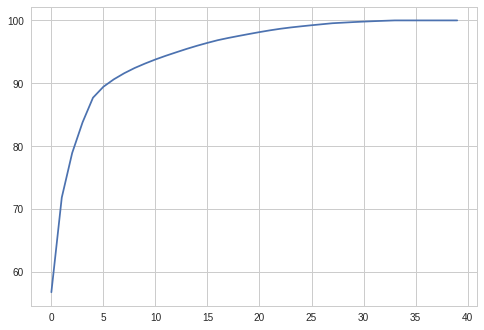

In [70]:
pca = PCA(n_components = 40)
pca.fit(X)
var = pca.explained_variance_ratio_
var_cum = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print(var_cum)
plt.plot(var_cum)

In [0]:
# Pick a number of components that explains 95-98%

pca2 = PCA(n_components = 18)
pca2.fit(X)
X_ft = pca2.fit_transform(X)
# loadings_df = pd.DataFrame(pca2.components_, columns = df.columns)

In [0]:
new_data = PCA(n_components=17,whiten=True).fit_transform(X)
k_range = range(2,15)
k_means_var = [KMeans(n_clusters=k).fit(new_data) for k in k_range]
labels = [i.labels_ for i in k_means_var]
sil_score = [metrics.silhouette_score(new_data,i,metric='euclidean') for i in labels]
centroids = [i.cluster_centers_ for i in k_means_var]
k_euclid = [cdist(new_data,cent,'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(new_data)**2/len(new_data))
bss = tss - wcss

In [73]:
for i in range(len(sil_score)):
  print(i, sil_score[i])

0 0.14267812482964828
1 0.07213760810802437
2 0.06824110770780396
3 0.06896776704352442
4 0.07271994176950984
5 0.06701754736082609
6 0.06674518518123801
7 0.06819141680032496
8 0.07014521497947511
9 0.07233982192363475
10 0.07040950706497011
11 0.0697147653796739
12 0.07106573220054209


<Figure size 576x396 with 0 Axes>

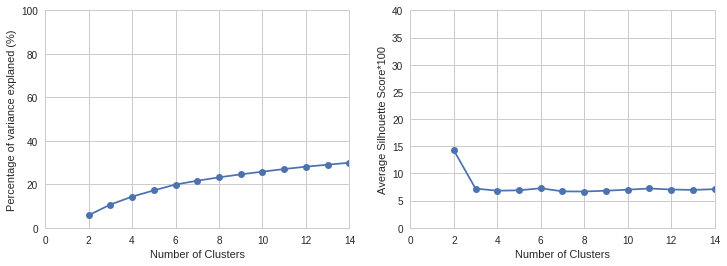

In [74]:
plt.clf()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(k_range, bss*100/tss, 'o-')
plt.axis([0,np.max(k_range),0,100])
plt.xlabel("Number of Clusters")
plt.ylabel('Percentage of variance explaned (%)');

plt.subplot(1,2,2)
plt.plot(k_range, np.transpose(sil_score)*100,'o-')
plt.axis([0,np.max(k_range),0,40])
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score*100');

plt.show();

In [0]:
fit_clusters = KMeans(n_clusters=4, random_state=237).fit(new_data)


In [76]:
# fit_clusters.labels_

player['kmeans_label'] = pd.Series(fit_clusters.labels_)


player.head()

,name,kmeans_label
0,L. Messi,2
1,Cristiano Ronaldo,2
2,Neymar Jr,2
3,De Gea,3
4,K. De Bruyne,0


In [78]:
for i in range(4):
  print(i, len(player[player['kmeans_label']==i]))

0 6027
1 4707
2 5447
3 2026


In [0]:
Cluster_1 = player[player['kmeans_label']==0]['name']
Cluster_2 = player[player['kmeans_label']==1]['name']
Cluster_3 = player[player['kmeans_label']==2]['name']
Cluster_4 = player[player['kmeans_label']==3]['name']
# Cluster_5 = player[player['kmeans_label']==4]['name']
# Cluster_6 = player[player['kmeans_label']==5]['name']


In [0]:
# prototype = player[np.argmin([euclidean(x,fit_clusters.cluster_centers_[0]) for x in new_data])]
# Cluster_1_pro = X[player['name'] == name]
# Cluster_1_pro = pd.DataFrame(Cluster_1_pro)


# Cluster_1_pro.columns = ['crossing', 'finishing', 'headingaccuracy',
#        'shortpassing', 'volleys', 'dribbling', 'curve', 'fkaccuracy',
#        'longpassing', 'ballcontrol', 'acceleration', 'sprintspeed', 'agility',
#        'reactions', 'balance', 'shotpower', 'jumping', 'stamina', 'strength',
#        'longshots', 'aggression', 'interceptions', 'positioning', 'vision',
#        'penalties', 'composure', 'marking', 'standingtackle', 'slidingtackle',
#        'gkdiving', 'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes',
#        'pace', 'shooting', 'passing', 'dribblingAbility', 'defending',
#        'physical', 'gkability']

# objects = Cluster_1_pro.columns
# x = np.arange(len(objects))
# y = Cluster_1_pro.values
# y = np.squeeze(y)
# plt.bar(x,y,align='center',alpha=0.5)
# plt.xticks(x,objects,rotation='vertical')

### Cosine Similarity

In [10]:
csX = pd.DataFrame(cosine_similarity(X))

csX.shape

(18207, 18207)

In [11]:
csX.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,18182,18183,18184,18185,18186,18187,18188,18189,18190,18191,18192,18193,18194,18195,18196,18197,18198,18199,18200,18201,18202,18203,18204,18205,18206
0,1.000000,0.921285,0.979226,-0.242793,0.895852,0.972237,0.862795,0.872295,0.565164,-0.354617,0.894779,0.765129,0.243888,0.935093,0.616649,0.972174,0.879831,0.933699,-0.364342,-0.372665,0.545027,0.819720,-0.249763,0.950348,0.092892,...,-0.742540,-0.714541,-0.868543,-0.664774,-0.641598,-0.632417,-0.466064,-0.437863,-0.682117,-0.832959,-0.838689,-0.708052,-0.748726,-0.741080,-0.629035,-0.352474,-0.734819,-0.747705,-0.276554,-0.871103,-0.627984,-0.631468,-0.399918,-0.427157,-0.806517
1,0.921285,1.000000,0.902389,-0.235168,0.865769,0.895997,0.791803,0.894010,0.686287,-0.330505,0.959739,0.657146,0.410755,0.833571,0.632499,0.937576,0.947324,0.957098,-0.331217,-0.358458,0.561681,0.937790,-0.207204,0.961562,0.276814,...,-0.843037,-0.742481,-0.876069,-0.754568,-0.754330,-0.623349,-0.624042,-0.444486,-0.768514,-0.878705,-0.837055,-0.793230,-0.792806,-0.809108,-0.770863,-0.542865,-0.781177,-0.843424,-0.340809,-0.823145,-0.798365,-0.637022,-0.453087,-0.550308,-0.870946
2,0.979226,0.902389,1.000000,-0.222823,0.884299,0.976943,0.868840,0.862157,0.555219,-0.353454,0.870283,0.757695,0.216560,0.925792,0.615952,0.962314,0.850792,0.920039,-0.372630,-0.366081,0.535988,0.816577,-0.245145,0.929214,0.073736,...,-0.724012,-0.701236,-0.865532,-0.619914,-0.616028,-0.613112,-0.453442,-0.443877,-0.690929,-0.818352,-0.818225,-0.665389,-0.745938,-0.724104,-0.635948,-0.324993,-0.741461,-0.718123,-0.279924,-0.861376,-0.626591,-0.648747,-0.358919,-0.420760,-0.817490
3,-0.242793,-0.235168,-0.222823,1.000000,-0.314215,-0.269173,-0.327634,-0.115783,-0.355486,0.949668,-0.289074,-0.319520,-0.207546,-0.272153,-0.275993,-0.321138,-0.291534,-0.301706,0.959076,0.958952,-0.250691,-0.308662,0.979159,-0.237274,-0.273760,...,0.028299,0.604777,0.006376,-0.003137,-0.026551,-0.036329,0.006598,-0.002080,0.040636,0.090797,0.072171,0.059582,0.575362,0.061550,-0.001171,-0.103880,0.594368,0.024483,0.154100,0.163156,0.024420,0.054986,0.031211,-0.102069,0.063855
4,0.895852,0.865769,0.884299,-0.314215,1.000000,0.909774,0.945406,0.905087,0.759818,-0.433682,0.870863,0.913167,0.472904,0.931406,0.810759,0.876605,0.916603,0.908876,-0.417943,-0.463672,0.778405,0.858326,-0.313666,0.851652,0.342886,...,-0.813839,-0.810527,-0.826335,-0.756591,-0.698847,-0.790271,-0.668465,-0.663851,-0.717463,-0.861893,-0.874805,-0.809453,-0.831935,-0.813908,-0.718510,-0.516451,-0.844664,-0.786980,-0.592828,-0.915299,-0.735501,-0.748614,-0.645644,-0.595837,-0.862035


In [0]:
# players = player['name'].tolist()
# players[0:5]

# for i in range(1,len(player_sim)+1):
#   player_sim.rename(columns={player_sim.columns[i]: player_sim.name[i-1]})

# csX.columns = players

In [13]:
player_sim = pd.concat([player,csX], axis='columns')

player_sim.head()

,name,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,...,18182,18183,18184,18185,18186,18187,18188,18189,18190,18191,18192,18193,18194,18195,18196,18197,18198,18199,18200,18201,18202,18203,18204,18205,18206
0,L. Messi,1.000000,0.921285,0.979226,-0.242793,0.895852,0.972237,0.862795,0.872295,0.565164,-0.354617,0.894779,0.765129,0.243888,0.935093,0.616649,0.972174,0.879831,0.933699,-0.364342,-0.372665,0.545027,0.819720,-0.249763,0.950348,...,-0.742540,-0.714541,-0.868543,-0.664774,-0.641598,-0.632417,-0.466064,-0.437863,-0.682117,-0.832959,-0.838689,-0.708052,-0.748726,-0.741080,-0.629035,-0.352474,-0.734819,-0.747705,-0.276554,-0.871103,-0.627984,-0.631468,-0.399918,-0.427157,-0.806517
1,Cristiano Ronaldo,0.921285,1.000000,0.902389,-0.235168,0.865769,0.895997,0.791803,0.894010,0.686287,-0.330505,0.959739,0.657146,0.410755,0.833571,0.632499,0.937576,0.947324,0.957098,-0.331217,-0.358458,0.561681,0.937790,-0.207204,0.961562,...,-0.843037,-0.742481,-0.876069,-0.754568,-0.754330,-0.623349,-0.624042,-0.444486,-0.768514,-0.878705,-0.837055,-0.793230,-0.792806,-0.809108,-0.770863,-0.542865,-0.781177,-0.843424,-0.340809,-0.823145,-0.798365,-0.637022,-0.453087,-0.550308,-0.870946
2,Neymar Jr,0.979226,0.902389,1.000000,-0.222823,0.884299,0.976943,0.868840,0.862157,0.555219,-0.353454,0.870283,0.757695,0.216560,0.925792,0.615952,0.962314,0.850792,0.920039,-0.372630,-0.366081,0.535988,0.816577,-0.245145,0.929214,...,-0.724012,-0.701236,-0.865532,-0.619914,-0.616028,-0.613112,-0.453442,-0.443877,-0.690929,-0.818352,-0.818225,-0.665389,-0.745938,-0.724104,-0.635948,-0.324993,-0.741461,-0.718123,-0.279924,-0.861376,-0.626591,-0.648747,-0.358919,-0.420760,-0.817490
3,De Gea,-0.242793,-0.235168,-0.222823,1.000000,-0.314215,-0.269173,-0.327634,-0.115783,-0.355486,0.949668,-0.289074,-0.319520,-0.207546,-0.272153,-0.275993,-0.321138,-0.291534,-0.301706,0.959076,0.958952,-0.250691,-0.308662,0.979159,-0.237274,...,0.028299,0.604777,0.006376,-0.003137,-0.026551,-0.036329,0.006598,-0.002080,0.040636,0.090797,0.072171,0.059582,0.575362,0.061550,-0.001171,-0.103880,0.594368,0.024483,0.154100,0.163156,0.024420,0.054986,0.031211,-0.102069,0.063855
4,K. De Bruyne,0.895852,0.865769,0.884299,-0.314215,1.000000,0.909774,0.945406,0.905087,0.759818,-0.433682,0.870863,0.913167,0.472904,0.931406,0.810759,0.876605,0.916603,0.908876,-0.417943,-0.463672,0.778405,0.858326,-0.313666,0.851652,...,-0.813839,-0.810527,-0.826335,-0.756591,-0.698847,-0.790271,-0.668465,-0.663851,-0.717463,-0.861893,-0.874805,-0.809453,-0.831935,-0.813908,-0.718510,-0.516451,-0.844664,-0.786980,-0.592828,-0.915299,-0.735501,-0.748614,-0.645644,-0.595837,-0.862035


In [32]:
# player_sim[['name', 'L. Messi']].sort_values('L. Messi', ascending=False).nlargest(5, 'L. Messi')

# most_sim_names = player_sim[['name', 'Cristiano Ronaldo']].sort_values('Cristiano Ronaldo', ascending=False).nlargest(6, 'Cristiano Ronaldo')

# most_sim_names['name'][1:]

268    C. Bakambu
933    D. Welbeck
347       A. Plea
476        M. Uth
122    F. Thauvin
Name: name, dtype: object

In [56]:
%%time

sim_list = []

for col in player_sim.columns[1:]:
  name_list = []
  sim_names = player_sim[['name', col]].sort_values(col, ascending=False).nlargest(6, col)
  sim_names = sim_names['name'][1:].tolist()
  name_list.append(sim_names)

  sim_list.append(name_list)

CPU times: user 2min 10s, sys: 53.5 ms, total: 2min 10s
Wall time: 2min 10s


In [42]:
sim_list[0]

[['Neymar Jr', 'E. Hazard', 'P. Dybala', 'A. Robben', 'Malcom']]

In [43]:
sim_df = pd.DataFrame(sim_list)
sim_df.columns = ['fiveMostSimilar']

sim_df.head()

,fiveMostSimilar
0,"[Neymar Jr, E. Hazard, P. Dybala, A. Robben, M..."
1,"[M. Uth, C. Bakambu, A. Plea, D. Welbeck, F. T..."
2,"[L. Messi, E. Hazard, Gonçalo Guedes, R. Mahre..."
3,"[J. Pickford, K. Schmeichel, M. Neuer, Ederson..."
4,"[Bruno Fernandes, Pizzi, G. Bonaventura, Koke,..."


In [48]:
sim_df['fiveMostSimilar'][2][1]

'E. Hazard'

In [0]:
base_cols = ['id', 'name','club','position']
base_df = df[base_cols]

In [50]:
df_sim = pd.concat([base_df, sim_df],axis='columns')

df_sim.head()

,id,name,club,position,fiveMostSimilar
0,158023,L. Messi,FC Barcelona,RF,"[Neymar Jr, E. Hazard, P. Dybala, A. Robben, M..."
1,20801,Cristiano Ronaldo,Juventus,ST,"[M. Uth, C. Bakambu, A. Plea, D. Welbeck, F. T..."
2,190871,Neymar Jr,Paris Saint-Germain,LW,"[L. Messi, E. Hazard, Gonçalo Guedes, R. Mahre..."
3,193080,De Gea,Manchester United,GK,"[J. Pickford, K. Schmeichel, M. Neuer, Ederson..."
4,192985,K. De Bruyne,Manchester City,RCM,"[Bruno Fernandes, Pizzi, G. Bonaventura, Koke,..."


### Export File

In [0]:
from google.colab import files

In [0]:
df_sim.to_json('FIFA_Similarity.json',orient='table')
files.download('FIFA_Similarity.json')

In [0]:
df_sim.to_csv('FIFA_Similarity.csv')
files.download('FIFA_Similarity.csv')

### Extra Stuff

In [0]:
import plotly.plotly as plty
plty.sign_in('aapte', 'o3VGqjZtnwlITCcV15V8')
import plotly.tools as tls

from plotly.tools import FigureFactory as FF
from plotly.graph_objs import *


# fig = FF.create_candlestick(priceW.Open, priceW.High, priceW.Low, priceW.Close, dates=priceW.index) # Remember to set Date as index prior to running this.
# py.iplot(fig, filename='bitcoin_chart', validate=False)
